In [1]:
# In Class Lab 6
# Surface Brightness Profiles


In [2]:
# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input: the radius, $R_e$, $n$ and the total stellar mass of the system.


In [3]:
# Function that will return the Sersic Profile for an Elliptical System
def SersicE(R,Re,n,Mtot):
    # Inputs:
    #    R, array of radii (kpc)
    #    Re, the half mass radius (kpc)
    #    n, the sersic index
    #    Mtot, the total stellar mass (Msun)
    # Return:
    #    Surface brightness profile (Lsun/kpc^2)
    
    # Assuming M/L ~ 1
    L = Mtot # total luminosity = total stellar mass
    
    # Ie = L / (7.2 pi Re^2)
    Ie = L/7.2/np.pi/Re**2
    
    # exponent 
    A = (R/Re)**(1/n)-1
    
    return Ie*np.exp(-7.67*A)
    
    
    

# Part B

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 


In [4]:
M31 = MassProfile('M31',0)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [5]:
R = np.arange(0.1,30,0.1)

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute themass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 


In [6]:
BulgeMass = M31.MassEnclosed(3,R)  # particle type 3 = bulge

In [7]:
BulgeMass[10]

<Quantity 4.43864301e+09 solMass>

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [8]:
# I = L / 4 pi D^2

BulgeI = BulgeMass/4/np.pi/R**2

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [10]:
BulgeTotal = np.max(BulgeMass) # total mass of the bulge

In [18]:
Low = BulgeTotal/2
High = BulgeTotal/2 + BulgeTotal/2*0.01

In [19]:
index = np.where((BulgeMass>Low) & (BulgeMass < High)) # multiple conditions for np.where

In [20]:
Re = R[index]

In [21]:
BulgeTotal

<Quantity 1.7838793e+10 solMass>

In [22]:
BulgeTotal/2

<Quantity 8.91939648e+09 solMass>

In [23]:
BulgeMass[index]

<Quantity [8.92942278e+09] solMass>

# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

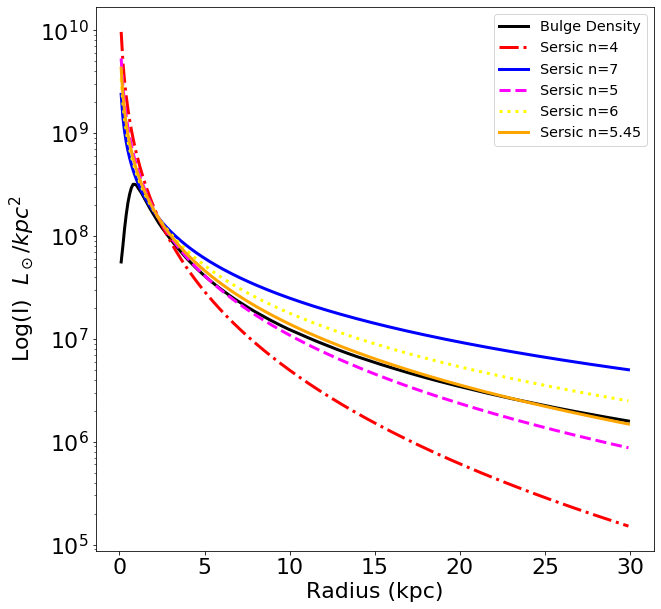

In [30]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R,BulgeI, color='black',linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 

plt.semilogy(R,SersicE(R,Re,4,BulgeTotal),color='red',linestyle='-.',linewidth=3,label='Sersic n=4')
plt.semilogy(R,SersicE(R,Re,7,BulgeTotal),color='blue',linestyle='-',linewidth=3,label='Sersic n=7')
plt.semilogy(R,SersicE(R,Re,5,BulgeTotal),color='magenta',linestyle='--',linewidth=3,label='Sersic n=5')
plt.semilogy(R,SersicE(R,Re,6,BulgeTotal),color='yellow',linestyle=':',linewidth=3,label='Sersic n=6')
plt.semilogy(R,SersicE(R,Re,5.45,BulgeTotal),color='orange',linestyle='solid',linewidth=3,label='Sersic n=5.45')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)



# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large')
